# CIFAR-10 USING LOGISTIC REGRESSION

In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision.datasets import CIFAR10
import torch.nn.functional as F 

import matplotlib.pyplot as plt

In [2]:
dataset = CIFAR10(root='C:/Users/prave/Desktop/Projects/Data', download=True)

Files already downloaded and verified


In [3]:
len(dataset)

50000

In [4]:
test_data = CIFAR10('C:/Users/prave/Desktop/Projects/Data', train=False)

In [5]:
len(test_data)

10000

In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Label:  frog


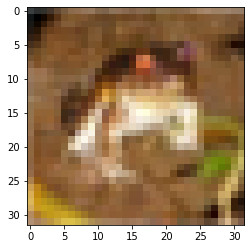

In [7]:
image, label = dataset[0]
plt.imshow(image)
print("Label: ",classes[label])

Label:  ship


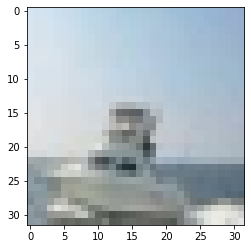

In [8]:
image, label = dataset[100]
plt.imshow(image)
print("Label: ",classes[label])

In [9]:
# These images need to be converted into tensors for further processing
from torchvision.transforms import transforms

In [10]:
dataset = CIFAR10('C:/Users/prave/Desktop/Projects/Data', train=True, transform=transforms.ToTensor())

In [11]:
img_tensor, label=dataset[0]
print(img_tensor.shape) 
print(classes[label])


torch.Size([3, 32, 32])
frog


# SPLITTING BETWEEN TRAIN AND VALIDATION SETS

In [12]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [40000,10000])

In [13]:
len(train_ds), len(val_ds)

(40000, 10000)

In [14]:
# To train data in batches
from torch.utils.data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [15]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# TRAINING THE MODEL

In [16]:
input_size = 3*32*32
num_classes = 10

In [17]:
class CifarModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, input_size)
        out = self.linear(xb)                     # Here self(images) passes the images to forward function...this is a method of calling a fuction within class without the use of object facilitated by pytorch..
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = CifarModel()

In [18]:
def evaluate_model(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate_model(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [19]:
# Testing model before updation of weights and biases
result0 = evaluate_model(model, val_loader)
result0

{'val_loss': 2.3471570014953613, 'val_acc': 0.13014240562915802}

In [20]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "praveenr2998/cifar10-logistic-regression" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/praveenr2998/cifar10-logistic-regression


'https://jovian.ml/praveenr2998/cifar10-logistic-regression'

In [21]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 2.1393, val_acc: 0.2488
Epoch [1], val_loss: 2.0641, val_acc: 0.2753
Epoch [2], val_loss: 2.0193, val_acc: 0.2986
Epoch [3], val_loss: 1.9888, val_acc: 0.3044
Epoch [4], val_loss: 1.9638, val_acc: 0.3210


In [22]:
history2 = fit(5, 0.0001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9602, val_acc: 0.3274
Epoch [1], val_loss: 1.9582, val_acc: 0.3282
Epoch [2], val_loss: 1.9562, val_acc: 0.3286
Epoch [3], val_loss: 1.9544, val_acc: 0.3305
Epoch [4], val_loss: 1.9523, val_acc: 0.3283


In [24]:
history2 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.8875, val_acc: 0.3507
Epoch [1], val_loss: 1.8788, val_acc: 0.3499
Epoch [2], val_loss: 1.8719, val_acc: 0.3550
Epoch [3], val_loss: 1.8673, val_acc: 0.3545
Epoch [4], val_loss: 1.8608, val_acc: 0.3553
Epoch [5], val_loss: 1.8557, val_acc: 0.3580
Epoch [6], val_loss: 1.8516, val_acc: 0.3588
Epoch [7], val_loss: 1.8469, val_acc: 0.3613
Epoch [8], val_loss: 1.8426, val_acc: 0.3665
Epoch [9], val_loss: 1.8396, val_acc: 0.3668
Epoch [10], val_loss: 1.8366, val_acc: 0.3653
Epoch [11], val_loss: 1.8322, val_acc: 0.3679
Epoch [12], val_loss: 1.8299, val_acc: 0.3645
Epoch [13], val_loss: 1.8262, val_acc: 0.3722
Epoch [14], val_loss: 1.8250, val_acc: 0.3698
Epoch [15], val_loss: 1.8212, val_acc: 0.3695
Epoch [16], val_loss: 1.8204, val_acc: 0.3705
Epoch [17], val_loss: 1.8167, val_acc: 0.3735
Epoch [18], val_loss: 1.8144, val_acc: 0.3721
Epoch [19], val_loss: 1.8120, val_acc: 0.3767


In [26]:
history3 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 1.8358, val_acc: 0.3475
Epoch [1], val_loss: 1.8211, val_acc: 0.3538
Epoch [2], val_loss: 1.8090, val_acc: 0.3526
Epoch [3], val_loss: 1.7889, val_acc: 0.3716
Epoch [4], val_loss: 1.7825, val_acc: 0.3772


In [27]:
history4 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 1.7845, val_acc: 0.3783
Epoch [1], val_loss: 1.8049, val_acc: 0.3604
Epoch [2], val_loss: 1.7949, val_acc: 0.3651
Epoch [3], val_loss: 1.8324, val_acc: 0.3520
Epoch [4], val_loss: 1.7499, val_acc: 0.3923


In [30]:
history5 = fit(20, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9939, val_acc: 0.3963
Epoch [1], val_loss: 1.9211, val_acc: 0.3976
Epoch [2], val_loss: 1.8776, val_acc: 0.4000
Epoch [3], val_loss: 1.8412, val_acc: 0.3970
Epoch [4], val_loss: 1.8425, val_acc: 0.3953
Epoch [5], val_loss: 1.8152, val_acc: 0.4008
Epoch [6], val_loss: 1.8100, val_acc: 0.3982
Epoch [7], val_loss: 1.8086, val_acc: 0.3905
Epoch [8], val_loss: 1.7880, val_acc: 0.3942
Epoch [9], val_loss: 1.7863, val_acc: 0.3926
Epoch [10], val_loss: 1.7687, val_acc: 0.3966
Epoch [11], val_loss: 1.7827, val_acc: 0.4011
Epoch [12], val_loss: 1.7715, val_acc: 0.3947
Epoch [13], val_loss: 1.7494, val_acc: 0.4073
Epoch [14], val_loss: 1.7592, val_acc: 0.3984
Epoch [15], val_loss: 1.7471, val_acc: 0.4045
Epoch [16], val_loss: 1.7471, val_acc: 0.4004
Epoch [17], val_loss: 1.7434, val_acc: 0.4042
Epoch [18], val_loss: 1.7550, val_acc: 0.3878
Epoch [19], val_loss: 1.7811, val_acc: 0.3835


In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "praveenr2998/cifar10-logistic-regression" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/praveenr2998/cifar10-logistic-regression


'https://jovian.ml/praveenr2998/cifar10-logistic-regression'